In [2]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#train_values = pd.read_csv(DATA_DIR / 'train_values.csv', index_col='building_id')
#train_labels = pd.read_csv(DATA_DIR / 'train_labels.csv', index_col='building_id')

df_train = pd.read_csv('train_values.csv', index_col='building_id')
df_train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

In [4]:
import os
cwd = os.getcwd()

In [5]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = df_train#[selected_features]
#train_values_subset = df_train

In [6]:
train_values_subset = pd.get_dummies(train_values_subset)

In [8]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [8]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2021))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2021))])

In [9]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [10]:
gs.fit(train_values_subset, df_train_labels.values.ravel())


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2021))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [11]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 100}

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Column'>

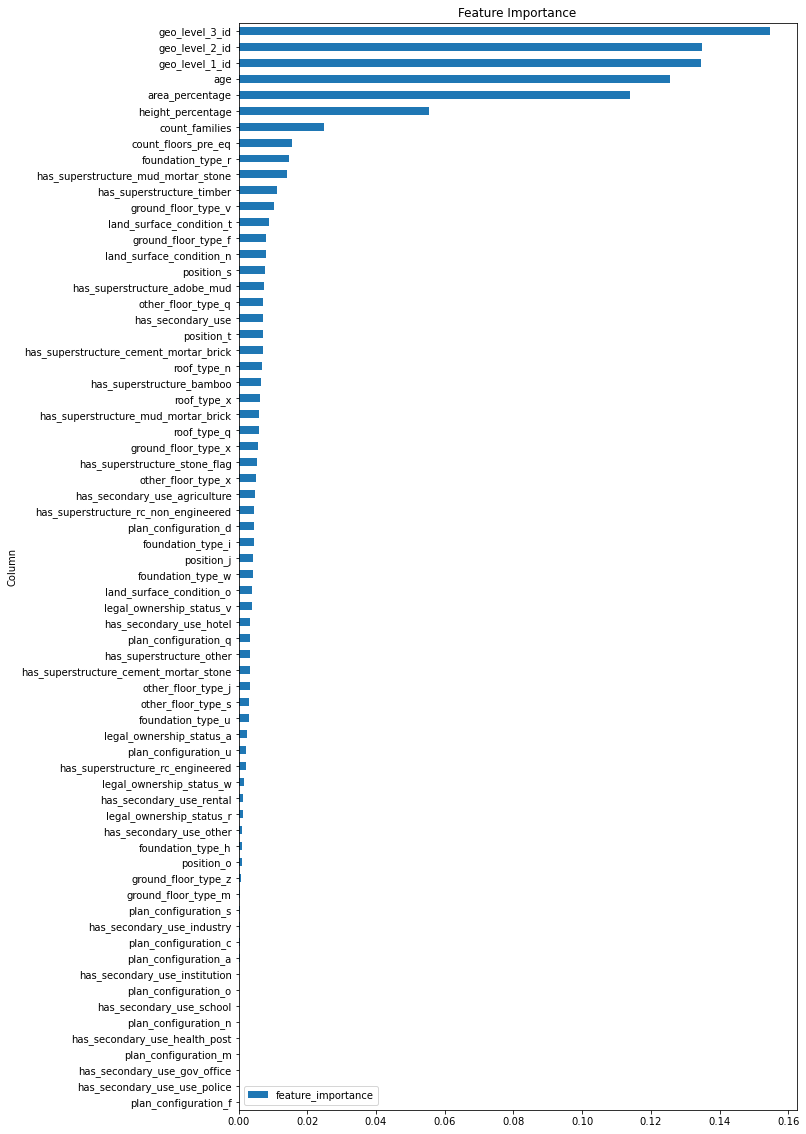

In [36]:
for_graph = pd.DataFrame(gs.best_estimator_._final_estimator.feature_importances_)
for_graph.columns = ['feature_importance']
for_graph['Column'] = train_values_subset.columns
for_graph.sort_values(by='feature_importance',ascending=True).plot(kind= 'barh', x='Column', y='feature_importance',title='Feature Importance',figsize=(10,20))

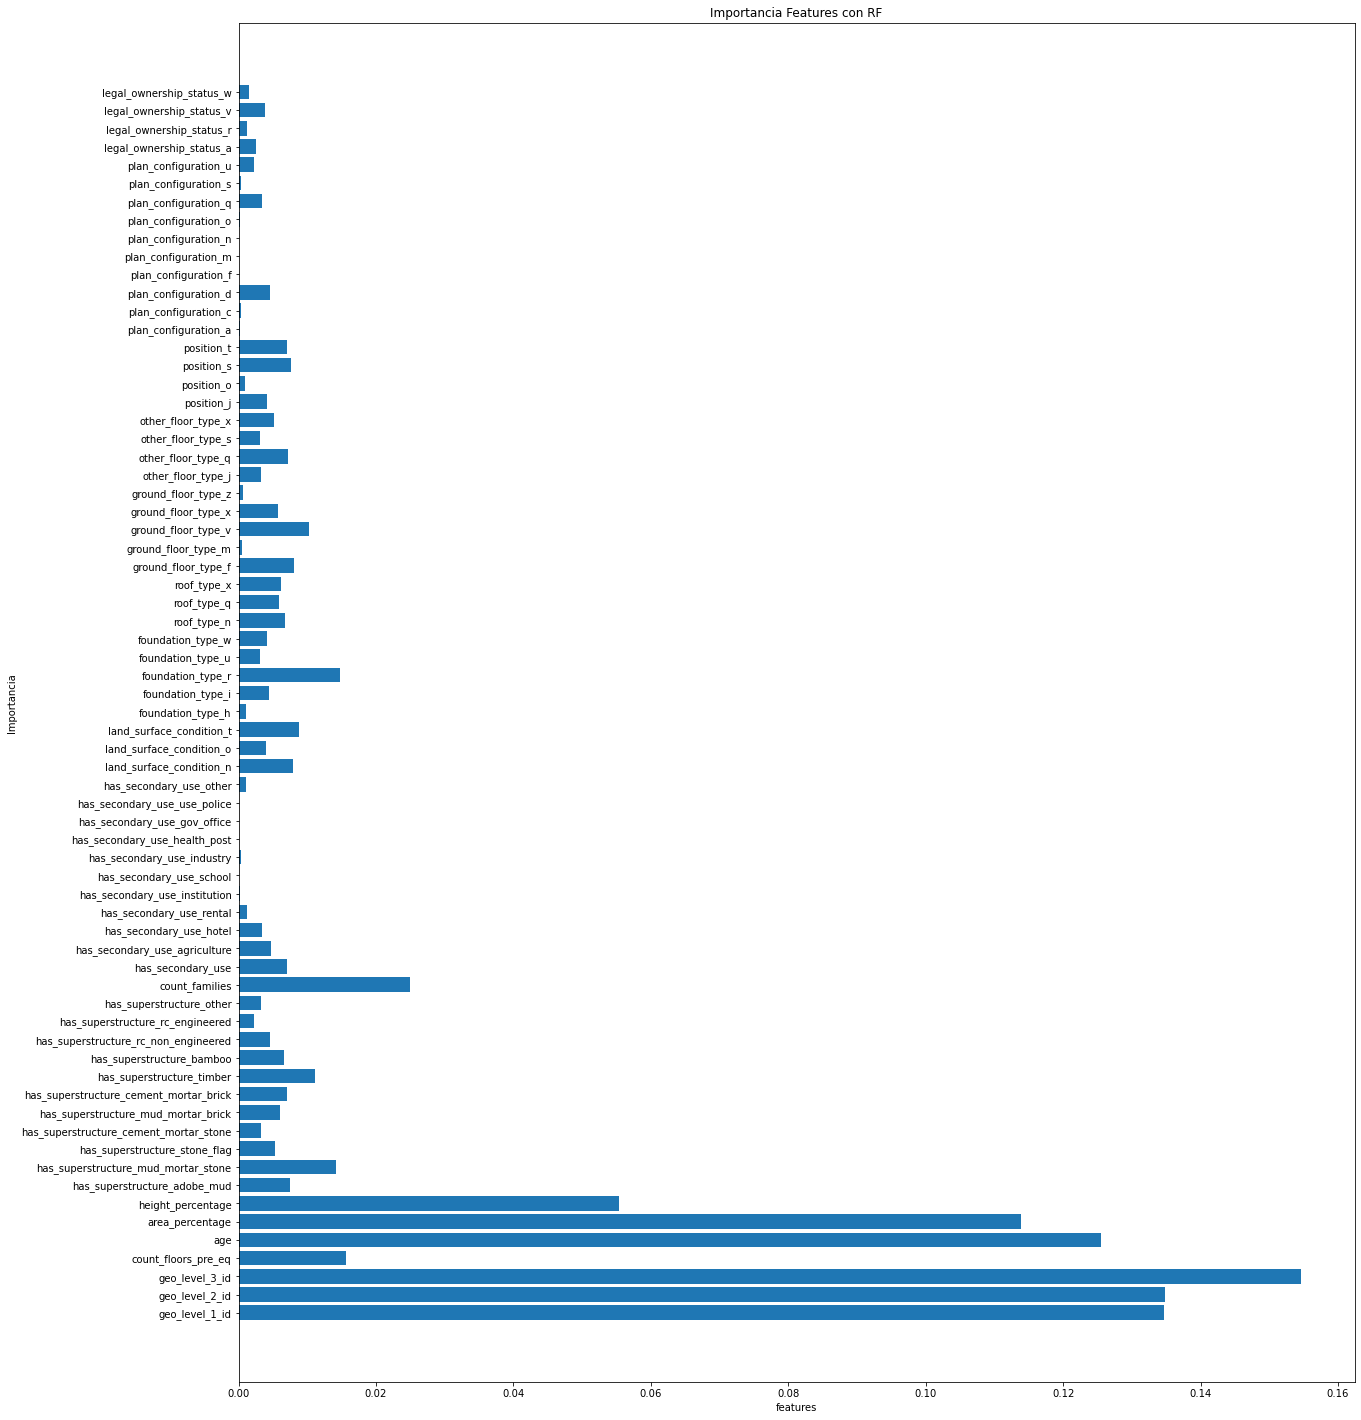

In [13]:
plt.figure(figsize=(20,25)) 
plt.barh(train_values_subset.columns, gs.best_estimator_._final_estimator.feature_importances_)
plt.xlabel('features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')

plt.show()

In [55]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(train_values_subset)
f1_score(df_train_labels, in_sample_preds, average='micro')

0.5894681908357988

In [56]:
test_values = pd.read_csv('C:\\Users\\caste\\Desktop\\7506\\2021\\tp\\data\\test_values.csv', index_col='building_id')


In [57]:
test_values_subset = test_values#[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)

In [58]:
predictions = gs.predict(test_values_subset)


ValueError: X has 68 features, but this StandardScaler is expecting 12 features as input.

In [ ]:
submission_format = pd.read_csv(DATA_DIR + 'submission_format.csv', index_col='building_id')


In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.head()

In [ ]:
my_submission.to_csv('C:\\Users\\caste\\Desktop\\7506\\2021\\tp\\data\\submissionRF_01.csv')